# TASK 2.4 Optimizing Hyperparameters - Random Forest 2010s

#### Importing libraries and data
#### Import unscaled data and pleasant weather sets (from 2.2)
#### Data Wrangling - choose single decade
#### Reshaping for modeling
#### Data Split
#### Hyperparameter Optimation, Grid and Random search
#### Random Forest with Optimized Search Parameters
#### Uncovering Feature Importances

## Importing libraries

In [73]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [5]:
#Define path
path = r'C:\Users\melan\OneDrive\Career Foundry\Machine Learning with Python\Data Sets'

In [6]:
path

'C:\\Users\\melan\\OneDrive\\Career Foundry\\Machine Learning with Python\\Data Sets'

In [7]:
#Import the cleaned unscaled data
X = pd.read_csv(os.path.join(path, 'unscaled_withdate.csv'), index_col = False)

In [8]:
X.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,19600104,1,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,19600105,1,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4


In [9]:
#Import the predictions data
pleasant_weather = pd.read_csv(os.path.join(path,'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [10]:
pleasant_weather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
X.shape

(22950, 137)

In [12]:
pleasant_weather.shape

(22950, 16)

Both X and y have the correct shapes

### Data Wrangling

In [15]:
# Reduce both data sets to one decade - let's choose 2010s
decade_df = X[(X['DATE'].astype(str).str[:4] >= '2010') & (X['DATE'].astype(str).str[:4] <='2019')].copy()

In [16]:
decade_df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,20100101,1,8,0.93,0.9965,0.18,0.56,0.0,2.9,-0.2,...,-7.0,1,0.80,1.0121,0.43,0.00,6.0,1.7,-1.6,5.0
18264,20100102,1,3,0.74,1.0193,0.58,0.00,5.2,-1.5,-4.2,...,-7.1,1,0.82,1.0196,0.45,0.00,6.0,0.8,-4.5,6.2
18265,20100103,1,3,0.75,1.0226,0.61,0.00,6.3,-3.2,-6.0,...,-7.1,4,0.71,1.0196,0.36,0.41,1.6,0.5,-4.1,5.1
18266,20100104,1,5,0.83,1.0169,0.48,0.00,3.7,-4.9,-8.3,...,-3.6,2,0.67,1.0219,0.48,0.51,6.5,3.7,1.3,3.8
18267,20100105,1,7,0.78,1.0073,0.53,0.04,4.4,-4.0,-7.1,...,-5.5,4,0.78,1.0117,0.45,0.09,4.7,2.3,-0.7,5.4


In [17]:
#we'll also reduce the pleasant_weather set to the 2010s...
decade_pleasant_weather = pleasant_weather[(pleasant_weather['DATE'].astype(str).str[:4] >= '2010') & (pleasant_weather['DATE'].astype(str).str[:4] <='2019')].copy()

In [18]:
decade_pleasant_weather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,20100101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18264,20100102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18265,20100103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18266,20100104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,20100105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
# Set display to show all rows
pd.set_option('display.max_rows', None)

In [20]:
# Let's just see the stations
stations = [col.split('_')[0] for col in decade_df.columns if '_' in col]

In [21]:
unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [22]:
# Create a dictionary to store the frequency of entries for each station
station_frequencies = {}

for station in unique_stations:
    # Select columns that belong to the current station
    station_columns = [col for col in decade_df.columns if col.startswith(station)]
    
    # Count non-missing entries across all columns for the station
    station_frequencies[station] = decade_df[station_columns].notna().sum().sum()

# Print the frequency of entries for each station
print("Frequency of entries for each weather station:")
for station, freq in station_frequencies.items():
    print(f"{station}: {freq} entries")

Frequency of entries for each weather station:
DEBILT: 32868 entries
BUDAPEST: 32868 entries
LJUBLJANA: 32868 entries
STOCKHOLM: 32868 entries
MAASTRICHT: 32868 entries
VALENTIA: 32868 entries
MADRID: 32868 entries
HEATHROW: 32868 entries
KASSEL: 32868 entries
BELGRADE: 32868 entries
OSLO: 32868 entries
SONNBLICK: 32868 entries
DUSSELDORF: 32868 entries
MUNCHENB: 32868 entries
BASEL: 32868 entries


In [23]:
# Oh perfect - the same number of entries on EVERY station! The random forest will run better this way.
# So now we take these two dataframes that are BOTH ONLY 2010 and remove the date/month columns
decade_df.drop(['DATE', 'MONTH'], axis = 1, inplace = True)

In [24]:
decade_df.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,8,0.93,0.9965,0.18,0.56,0.0,2.9,-0.2,4.8,6,...,-7.0,1,0.80,1.0121,0.43,0.00,6.0,1.7,-1.6,5.0
18264,3,0.74,1.0193,0.58,0.00,5.2,-1.5,-4.2,0.4,8,...,-7.1,1,0.82,1.0196,0.45,0.00,6.0,0.8,-4.5,6.2
18265,3,0.75,1.0226,0.61,0.00,6.3,-3.2,-6.0,1.1,7,...,-7.1,4,0.71,1.0196,0.36,0.41,1.6,0.5,-4.1,5.1
18266,5,0.83,1.0169,0.48,0.00,3.7,-4.9,-8.3,-3.1,2,...,-3.6,2,0.67,1.0219,0.48,0.51,6.5,3.7,1.3,3.8
18267,7,0.78,1.0073,0.53,0.04,4.4,-4.0,-7.1,-1.5,6,...,-5.5,4,0.78,1.0117,0.45,0.09,4.7,2.3,-0.7,5.4


In [25]:
# here's also the pleasant weather 2010 set...
decade_pleasant_weather.drop(['DATE'], axis = 1, inplace = True)

In [26]:
decade_pleasant_weather.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18265,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18266,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Reshaping for modeling

We'll create and run the random forest model. Plot figures of at least two different trees and take a screenshot to paste into a document.
#Hint: the shape will be X = (3653, 135) and y = (3653) for one decade of information.

In [29]:
X = decade_df

In [30]:
y = decade_pleasant_weather

In [31]:
# Let's turn them from a dataframe into an array
X = np.array(X)
y = np.array(y)

In [32]:
X.shape

(3652, 135)

In [33]:
y.shape

(3652, 15)

### Data Split

In [35]:
# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [36]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


### Hyperparameter Optimization

In [38]:
# Creating the RF classifier
clf = RandomForestClassifier()

In [39]:
grid_space = {
    'max_depth': [5, 10],        # Fewer values
    'n_estimators': [50, 100],   # Fewer estimators
    'max_features': [15, 50],    # Reduce max features
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2]
}


In [40]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=2)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Search took 1.7711373726526896 minutes


In [41]:
# Print grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 10, 'max_features': 50, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 0.6210295728368017


### Random Search

In [43]:
# Define the random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(15, 135),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [44]:
# Create a RF Classifier
clf2 = RandomForestClassifier()

In [45]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) 
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search took 9.172845482826233 minutes


In [46]:
# Print random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': None, 'max_features': 99, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 360}
Best RANDOM search score is: 0.6370938298649143


In [47]:
# Grid search results vs. random search results
# Print grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 10, 'max_features': 50, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 0.6210295728368017
Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': None, 'max_features': 99, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 360}
Best RANDOM search score is: 0.6370938298649143


The RANDOM is just ever so slightly better with it's accuracy score... we'll use these hyperparameters to optimize the random forest

### Random Forest with Optimized Search Parameters

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Creating a Random Forest Classifier with the best parameters from Randomized Search
clf3 = RandomForestClassifier(
    n_estimators=360,  # From Randomized Search
    max_depth=None,     # From Randomized Search
    max_features=99,    # From Randomized Search
    min_samples_leaf=1, # From Randomized Search
    min_samples_split=2, # From Randomized Search
    criterion='entropy' # From Randomized Search
)  

# Training the model on the training dataset
clf3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=99, n_estimators=360)

In [52]:
# performing predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6538882803943045


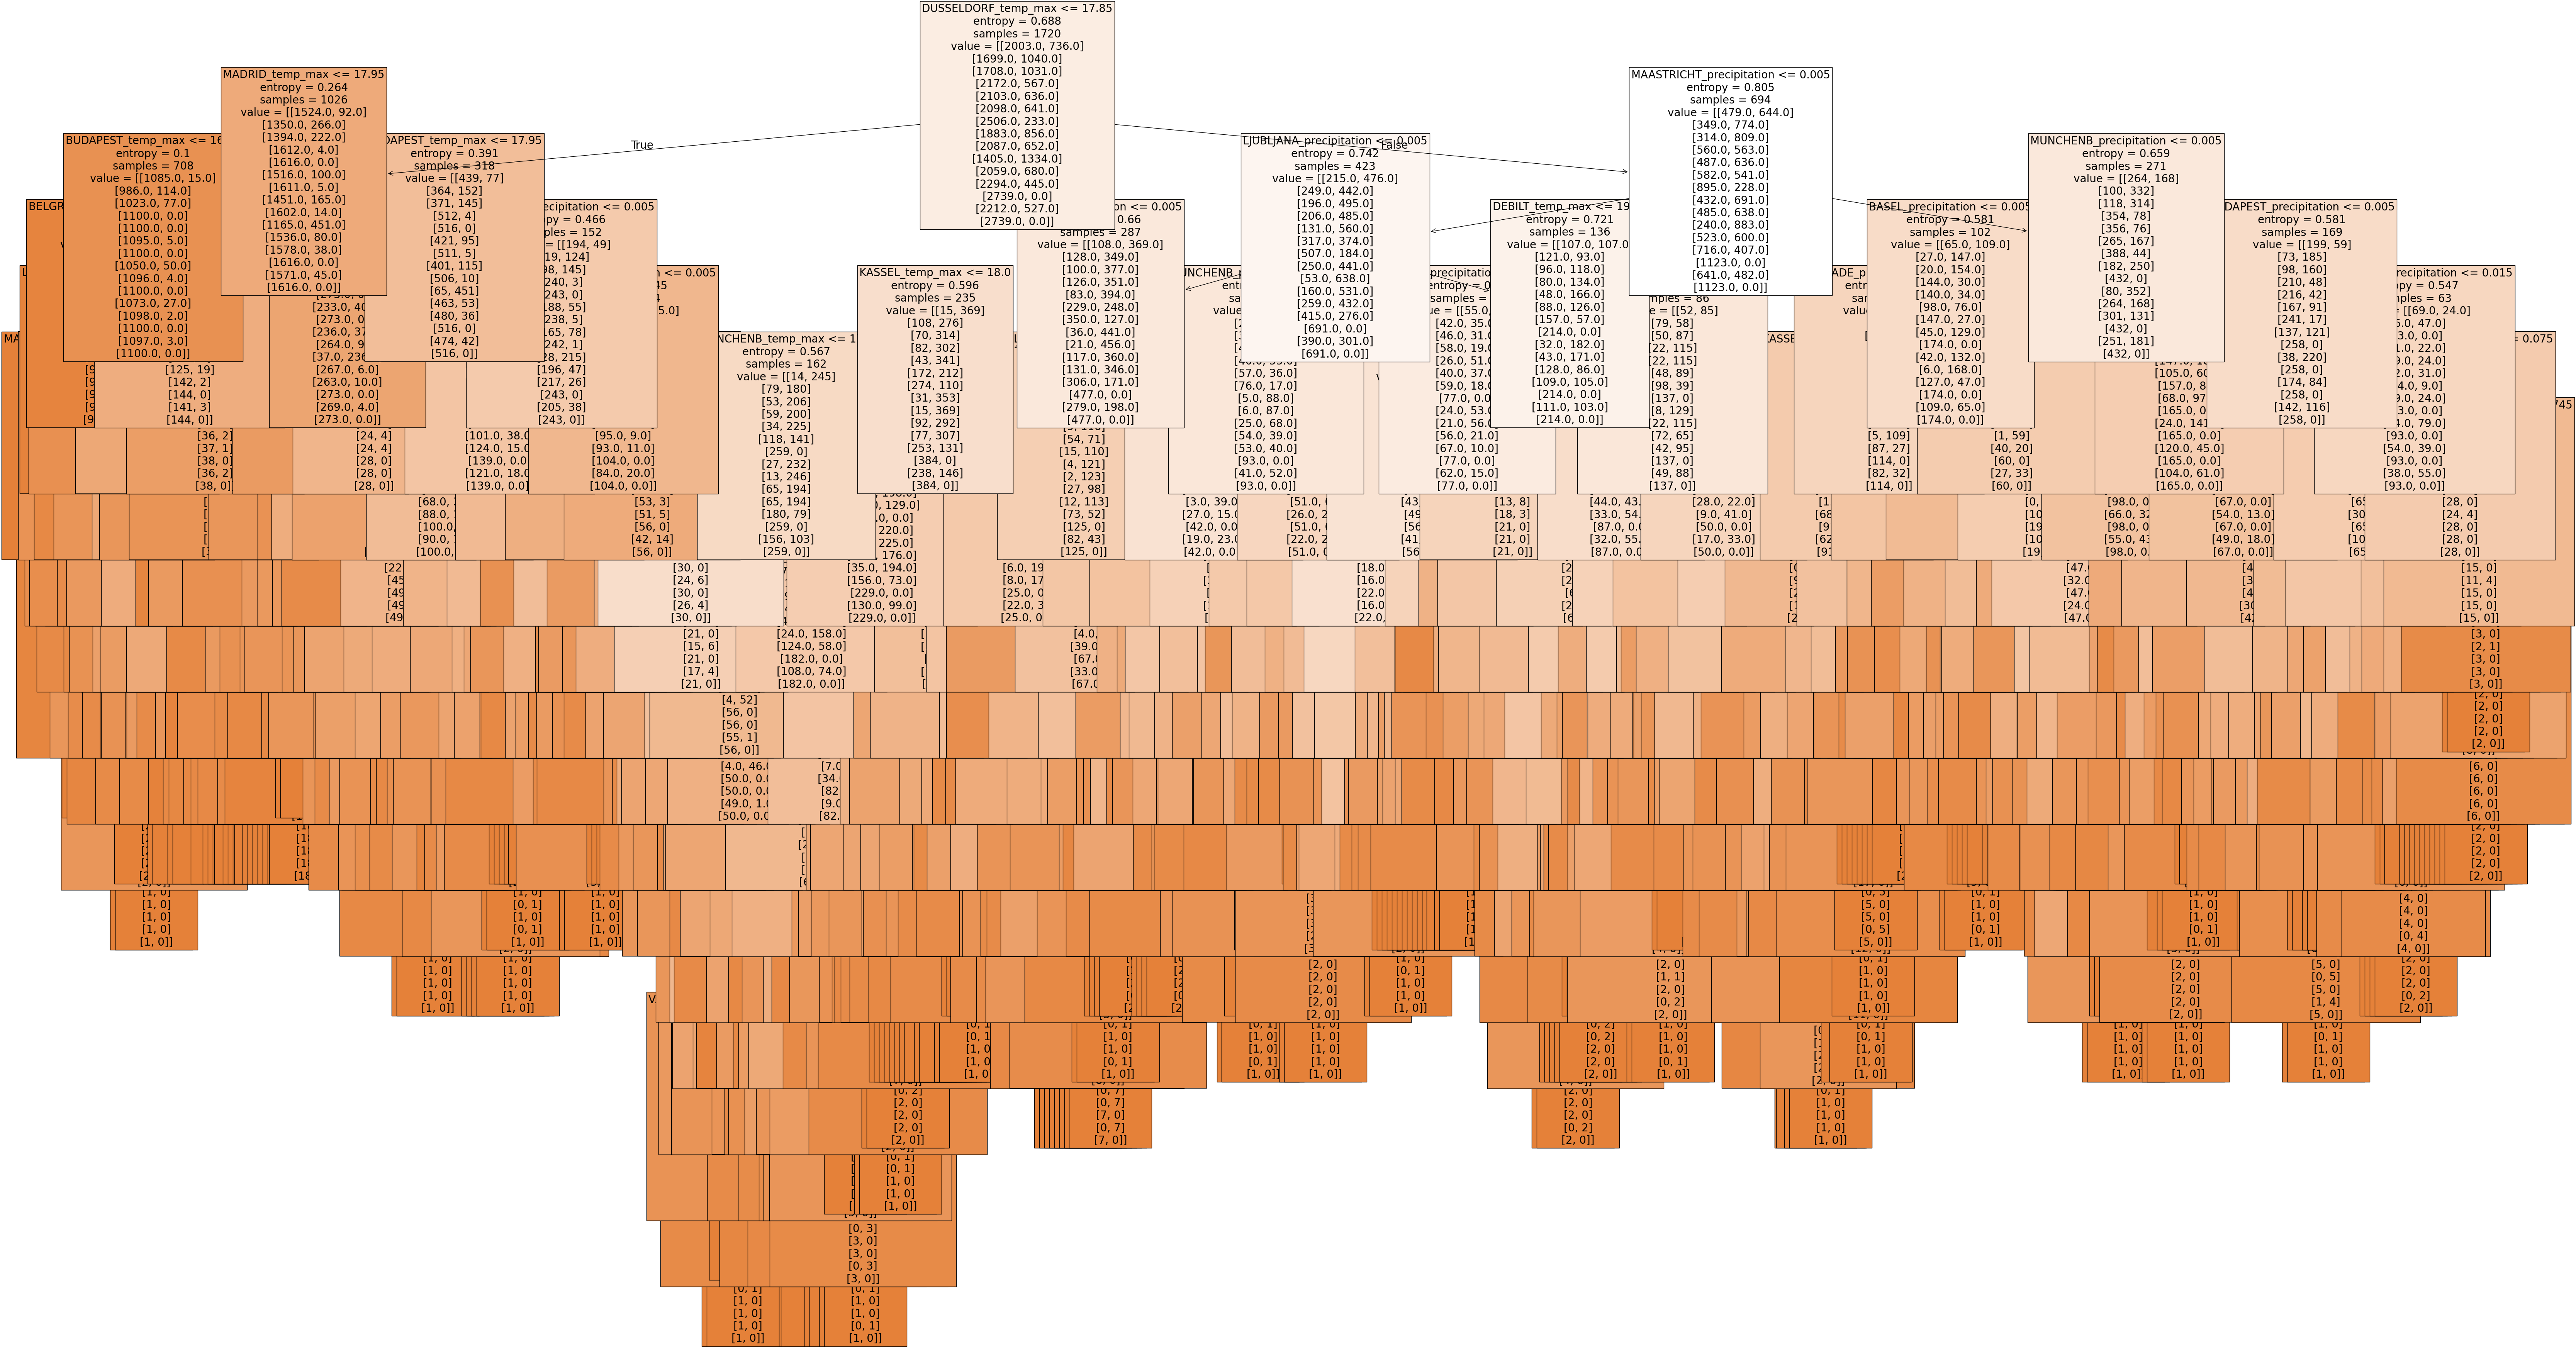

In [53]:
fig = plt.figure(figsize = (80, 40))
plot_tree(clf3.estimators_[15], fontsize = 20, feature_names = decade_df.columns, class_names = ['unpleasant', 'pleasant'], filled = True);

In [54]:
fig.savefig(os.path.join(path, 'Visualizations', 'optimized_random_forest_2010s.png'), bbox_inches = 'tight')

### Retrieve feature importances from trained model

In [59]:
newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(135,)


array([1.65809169e-03, 2.25786090e-03, 2.05025640e-03, 2.19304974e-03,
       2.67559413e-02, 3.60125035e-03, 2.14554781e-03, 1.81934208e-03,
       3.04843472e-02, 2.40502989e-03, 2.23610350e-03, 2.11953244e-03,
       1.99513806e-03, 2.75539219e-02, 2.13891049e-03, 3.87775328e-03,
       1.93626721e-03, 1.79572895e-02, 2.08146224e-04, 0.00000000e+00,
       0.00000000e+00, 7.75282041e-04, 2.56327656e-02, 7.56179107e-04,
       6.90215810e-03, 1.90694609e-03, 2.01197822e-02, 1.45634009e-03,
       1.84269182e-03, 1.96723103e-03, 2.33651070e-03, 1.32396661e-02,
       2.44049602e-03, 2.12652261e-03, 2.18966155e-03, 4.12637074e-02,
       1.32674600e-03, 1.79760123e-03, 1.81429956e-03, 1.97527337e-03,
       3.19313729e-02, 2.47229702e-03, 2.99419013e-03, 1.80488411e-03,
       2.04543452e-01, 1.87265537e-03, 3.23564712e-03, 2.26879002e-03,
       3.21716254e-03, 1.34260007e-02, 3.52085191e-03, 2.39036293e-03,
       1.86870259e-03, 9.17610495e-03, 1.32015542e-03, 1.08007047e-03,
      

In [61]:
# Reshape newarray
newarray = newarray.reshape(-1, 15, 9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[1.65809169e-03, 2.25786090e-03, 2.05025640e-03, 2.19304974e-03,
         2.67559413e-02, 3.60125035e-03, 2.14554781e-03, 1.81934208e-03,
         3.04843472e-02],
        [2.40502989e-03, 2.23610350e-03, 2.11953244e-03, 1.99513806e-03,
         2.75539219e-02, 2.13891049e-03, 3.87775328e-03, 1.93626721e-03,
         1.79572895e-02],
        [2.08146224e-04, 0.00000000e+00, 0.00000000e+00, 7.75282041e-04,
         2.56327656e-02, 7.56179107e-04, 6.90215810e-03, 1.90694609e-03,
         2.01197822e-02],
        [1.45634009e-03, 1.84269182e-03, 1.96723103e-03, 2.33651070e-03,
         1.32396661e-02, 2.44049602e-03, 2.12652261e-03, 2.18966155e-03,
         4.12637074e-02],
        [1.32674600e-03, 1.79760123e-03, 1.81429956e-03, 1.97527337e-03,
         3.19313729e-02, 2.47229702e-03, 2.99419013e-03, 1.80488411e-03,
         2.04543452e-01],
        [1.87265537e-03, 3.23564712e-03, 2.26879002e-03, 3.21716254e-03,
         1.34260007e-02, 3.52085191e-03, 2.39036293e-03, 1.86870259

In [63]:
# Collapse this shape into one observation for each weather station
sumarray = np.sum(newarray[0], axis = 1)
sumarray

array([0.07296569, 0.06221995, 0.05630126, 0.06886283, 0.25066012,
       0.04097628, 0.02623888, 0.06873863, 0.11767164, 0.08183959,
       0.0535458 , 0.04494024, 0.01626608, 0.03600975, 0.00276327])

In [65]:
# Convert the unique stations (from the beginning of this script) to a list
unique_stations_list = list(unique_stations)

In [67]:
important = pd.Series(sumarray, index = unique_stations_list) 
important = important.sort_values(ascending = False)
important

MAASTRICHT    0.250660
KASSEL        0.117672
BELGRADE      0.081840
DEBILT        0.072966
STOCKHOLM     0.068863
HEATHROW      0.068739
BUDAPEST      0.062220
LJUBLJANA     0.056301
OSLO          0.053546
SONNBLICK     0.044940
VALENTIA      0.040976
MUNCHENB      0.036010
MADRID        0.026239
DUSSELDORF    0.016266
BASEL         0.002763
dtype: float64

In [69]:
# Create a dataframe to associate weather stations with their importances
df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance':sumarray
})
df_importance = df_importance.sort_values(by = 'Importance', ascending = False)

['DEBILT', 'BUDAPEST', 'LJUBLJANA', 'STOCKHOLM', 'MAASTRICHT', 'VALENTIA', 'MADRID', 'HEATHROW', 'KASSEL', 'BELGRADE', 'OSLO', 'SONNBLICK', 'DUSSELDORF', 'MUNCHENB', 'BASEL']


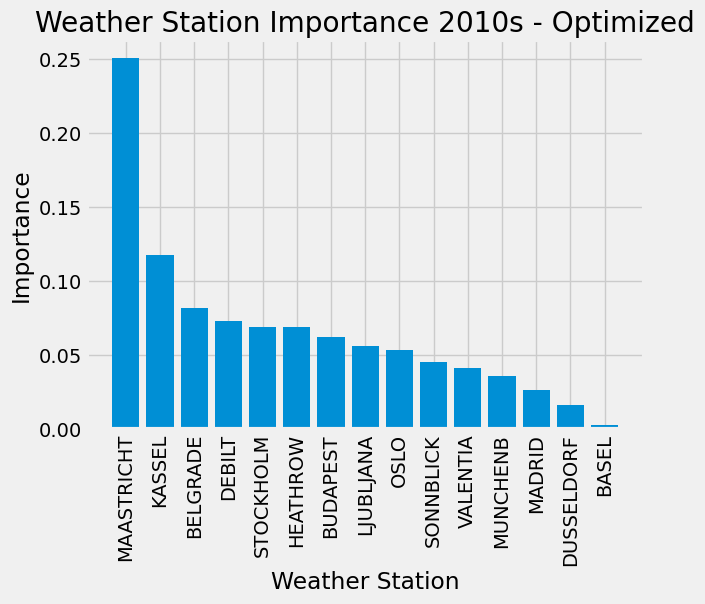

In [71]:
# Plot the results
%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s - Optimized')

plt.savefig(os.path.join(path, 'Visualizations', 'optimized_2010s_feauture_importances.png'), bbox_inches='tight')

plt.show()

In [79]:
# Evaluate using the trained classifier
print(classification_report(y_test, (clf3.predict(X_test) > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       254
           1       0.90      0.98      0.94       342
           2       0.91      0.98      0.95       323
           3       0.96      0.87      0.91       211
           4       0.96      0.96      0.96       225
           5       0.87      0.80      0.84       220
           6       0.92      0.66      0.77        82
           7       0.96      0.97      0.97       274
           8       0.94      1.00      0.97       221
           9       0.86      1.00      0.93       434
          10       0.94      0.94      0.94       230
          11       0.94      0.75      0.83       137
          12       0.00      0.00      0.00         0
          13       0.90      0.80      0.85       205
          14       0.00      0.00      0.00         0

   micro avg       0.92      0.93      0.92      3158
   macro avg       0.80      0.78      0.79      3158
weighted avg       0.92   

C:\Users\melan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\melan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\melan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\melan\anaconda3\Lib\site-package